**SNA FINAL PROJECT: PIXAR EASTER EGGS** 
Indigo, Annie, and Sophie

Change csv into a matrix.

In [2]:
import csv

# list for a matrix representation
rows = []
with open("eastereggs.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    rows.append(header)
    for row in csvreader:
        rows.append(row)

print(rows)

[['', '1) Toy Story (1995)', '2) A Bug’s Life (1998)', '3) Toy Story 2 (1999)', '4) Monsters, Inc. (2001)', '5) Finding Nemo (2003)', '6) The Incredibles (2004)', '7) Cars (2006)', '8) Ratatouille (2007)', '9) WALL-E (2008)', '10) Up (2009)', '11) Toy Story 3 (2010)', '12) Cars 2 (2011)', '13) Brave (2012)', '14) Monsters University (2013)', '15) Inside Out (2015)', '16) The Good Dinosaur (2015)', '17) Finding Dory (2016)', '18) Cars 3 (2017)', '19) Coco (2017)', '20) Incredibles 2 (2018)', '21) Toy Story 4 (2019)', '22) Onward (2020)', '23) Soul (2020)', '24) Luca (2021)', '25) Turning Red (2022)', '26) Lightyear (2022)', '27) Elemental (2023)'], ['1) Toy Story (1995)', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['2) A Bug’s Life (1998)', '2', '', '', '', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['3) Toy Story 2 (1999)', '1', '8', '', '', '', '', '', '', '', '', '', 

Create nodes from the movie titles. 

In [3]:
import networkx as nx
G = nx.DiGraph()

G.add_nodes_from(rows[0][1:])
G.nodes()

NodeView(('1) Toy Story (1995)', '2) A Bug’s Life (1998)', '3) Toy Story 2 (1999)', '4) Monsters, Inc. (2001)', '5) Finding Nemo (2003)', '6) The Incredibles (2004)', '7) Cars (2006)', '8) Ratatouille (2007)', '9) WALL-E (2008)', '10) Up (2009)', '11) Toy Story 3 (2010)', '12) Cars 2 (2011)', '13) Brave (2012)', '14) Monsters University (2013)', '15) Inside Out (2015)', '16) The Good Dinosaur (2015)', '17) Finding Dory (2016)', '18) Cars 3 (2017)', '19) Coco (2017)', '20) Incredibles 2 (2018)', '21) Toy Story 4 (2019)', '22) Onward (2020)', '23) Soul (2020)', '24) Luca (2021)', '25) Turning Red (2022)', '26) Lightyear (2022)', '27) Elemental (2023)'))

Add the edges based on matrix data. 

In [4]:
for i in range(1,len(rows)):
  for j in range(1, len(rows[0])):
    if rows[i][j] != '' and rows[i][j]!= " ":
      weight = int(rows[i][j])
      G.add_weighted_edges_from([(rows[i][0], rows[0][j], weight)])

In [5]:
!pip install ipysigma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.6 MB/s eta 0:00:00


Plot the graph using Sigma.

In [6]:
from google.colab import output
output.enable_custom_widget_manager()
from ipysigma import Sigma
Sigma(G)

Sigma(nx.DiGraph with 27 nodes and 159 edges)

Analysis: 

In [7]:
sorted(G.degree, key=lambda x: x[1], reverse=True) # create list of most to least connected movies

[('1) Toy Story (1995)', 27),
 ('21) Toy Story 4 (2019)', 20),
 ('9) WALL-E (2008)', 19),
 ('5) Finding Nemo (2003)', 18),
 ('11) Toy Story 3 (2010)', 18),
 ('15) Inside Out (2015)', 18),
 ('23) Soul (2020)', 18),
 ('19) Coco (2017)', 16),
 ('4) Monsters, Inc. (2001)', 15),
 ('7) Cars (2006)', 13),
 ('8) Ratatouille (2007)', 13),
 ('2) A Bug’s Life (1998)', 12),
 ('10) Up (2009)', 11),
 ('6) The Incredibles (2004)', 10),
 ('3) Toy Story 2 (1999)', 9),
 ('22) Onward (2020)', 9),
 ('25) Turning Red (2022)', 9),
 ('12) Cars 2 (2011)', 8),
 ('17) Finding Dory (2016)', 8),
 ('26) Lightyear (2022)', 8),
 ('14) Monsters University (2013)', 7),
 ('20) Incredibles 2 (2018)', 7),
 ('24) Luca (2021)', 7),
 ('13) Brave (2012)', 6),
 ('16) The Good Dinosaur (2015)', 6),
 ('18) Cars 3 (2017)', 5),
 ('27) Elemental (2023)', 1)]

In [8]:
#print(nx.diameter(G))
#impossible because digraph is not strongly connected

In [9]:
#  BETWEENNESS CENTRALITY

scores=nx.betweenness_centrality(G)
#Descending order sorting centrality
scores_sorted=dict(sorted(scores.items(), key=lambda item: item[1],reverse=True))
scores_sorted

{'5) Finding Nemo (2003)': 0.19466483516483513,
 '21) Toy Story 4 (2019)': 0.1677216117216117,
 '15) Inside Out (2015)': 0.1451648351648352,
 '23) Soul (2020)': 0.10158974358974358,
 '7) Cars (2006)': 0.09414468864468864,
 '9) WALL-E (2008)': 0.09160989010989011,
 '11) Toy Story 3 (2010)': 0.05725824175824177,
 '16) The Good Dinosaur (2015)': 0.054,
 '19) Coco (2017)': 0.053294871794871794,
 '6) The Incredibles (2004)': 0.04955677655677656,
 '17) Finding Dory (2016)': 0.04942673992673992,
 '14) Monsters University (2013)': 0.049355311355311356,
 '26) Lightyear (2022)': 0.044807692307692305,
 '2) A Bug’s Life (1998)': 0.044067765567765566,
 '4) Monsters, Inc. (2001)': 0.04091025641025641,
 '20) Incredibles 2 (2018)': 0.03880769230769231,
 '22) Onward (2020)': 0.038205128205128204,
 '24) Luca (2021)': 0.03538461538461538,
 '12) Cars 2 (2011)': 0.013835164835164832,
 '8) Ratatouille (2007)': 0.013040293040293041,
 '25) Turning Red (2022)': 0.010705128205128204,
 '13) Brave (2012)': 0.0092

In [10]:
# DEGREE CENTRALITY

scores=nx.degree_centrality(G)
#Descending order sorting centrality
scores_sorted=dict(sorted(scores.items(), key=lambda item: item[1],reverse=True))
scores_sorted

{'1) Toy Story (1995)': 1.0384615384615385,
 '21) Toy Story 4 (2019)': 0.7692307692307693,
 '9) WALL-E (2008)': 0.7307692307692308,
 '5) Finding Nemo (2003)': 0.6923076923076923,
 '11) Toy Story 3 (2010)': 0.6923076923076923,
 '15) Inside Out (2015)': 0.6923076923076923,
 '23) Soul (2020)': 0.6923076923076923,
 '19) Coco (2017)': 0.6153846153846154,
 '4) Monsters, Inc. (2001)': 0.576923076923077,
 '7) Cars (2006)': 0.5,
 '8) Ratatouille (2007)': 0.5,
 '2) A Bug’s Life (1998)': 0.46153846153846156,
 '10) Up (2009)': 0.42307692307692313,
 '6) The Incredibles (2004)': 0.38461538461538464,
 '3) Toy Story 2 (1999)': 0.34615384615384615,
 '22) Onward (2020)': 0.34615384615384615,
 '25) Turning Red (2022)': 0.34615384615384615,
 '12) Cars 2 (2011)': 0.3076923076923077,
 '17) Finding Dory (2016)': 0.3076923076923077,
 '26) Lightyear (2022)': 0.3076923076923077,
 '14) Monsters University (2013)': 0.2692307692307693,
 '20) Incredibles 2 (2018)': 0.2692307692307693,
 '24) Luca (2021)': 0.26923076

In [11]:
# CLOSENESS CENTRALITY
scores=nx.closeness_centrality(G)
#Descending order sorting centrality
scores_sorted=dict(sorted(scores.items(), key=lambda item: item[1],reverse=True))
scores_sorted

{'1) Toy Story (1995)': 0.9615384615384616,
 '4) Monsters, Inc. (2001)': 0.5987525987525988,
 '2) A Bug’s Life (1998)': 0.582995951417004,
 '5) Finding Nemo (2003)': 0.582995951417004,
 '11) Toy Story 3 (2010)': 0.5152057245080501,
 '3) Toy Story 2 (1999)': 0.4816053511705686,
 '9) WALL-E (2008)': 0.4816053511705686,
 '6) The Incredibles (2004)': 0.4713584288052373,
 '7) Cars (2006)': 0.46153846153846156,
 '10) Up (2009)': 0.46153846153846156,
 '15) Inside Out (2015)': 0.4521193092621664,
 '21) Toy Story 4 (2019)': 0.4521193092621664,
 '14) Monsters University (2013)': 0.4430769230769231,
 '8) Ratatouille (2007)': 0.4343891402714932,
 '12) Cars 2 (2011)': 0.41025641025641024,
 '20) Incredibles 2 (2018)': 0.41025641025641024,
 '16) The Good Dinosaur (2015)': 0.36923076923076925,
 '13) Brave (2012)': 0.36317780580075665,
 '19) Coco (2017)': 0.3573200992555831,
 '17) Finding Dory (2016)': 0.330654420206659,
 '26) Lightyear (2022)': 0.330654420206659,
 '22) Onward (2020)': 0.31648351648351

In [12]:
# EIGENVECTOR CENTRALITY
scores=nx.eigenvector_centrality(G, max_iter=200)
#Descending order sorting centrality
scores_sorted=dict(sorted(scores.items(), key=lambda item: item[1],reverse=True))
scores_sorted

{'1) Toy Story (1995)': 0.7200225425231882,
 '4) Monsters, Inc. (2001)': 0.2990846442281873,
 '5) Finding Nemo (2003)': 0.2852177208967696,
 '2) A Bug’s Life (1998)': 0.2681688212907507,
 '11) Toy Story 3 (2010)': 0.19294760353890364,
 '6) The Incredibles (2004)': 0.18164880760139362,
 '7) Cars (2006)': 0.17382330488056236,
 '3) Toy Story 2 (1999)': 0.1472339931325476,
 '10) Up (2009)': 0.14547667558393987,
 '9) WALL-E (2008)': 0.14384565257480963,
 '21) Toy Story 4 (2019)': 0.14081737191268026,
 '14) Monsters University (2013)': 0.11609207765755221,
 '8) Ratatouille (2007)': 0.11515217143532112,
 '12) Cars 2 (2011)': 0.08999676846905387,
 '20) Incredibles 2 (2018)': 0.07247942612148237,
 '15) Inside Out (2015)': 0.0713099787010127,
 '13) Brave (2012)': 0.056397835750040454,
 '16) The Good Dinosaur (2015)': 0.03941235894969664,
 '22) Onward (2020)': 0.037348760105968284,
 '26) Lightyear (2022)': 0.03676944422448024,
 '19) Coco (2017)': 0.036563221404314714,
 '23) Soul (2020)': 0.022851

[Text(27.4, 0, '27'),
 Text(20.4, 0, '20'),
 Text(19.4, 0, '19'),
 Text(18.4, 0, '18'),
 Text(16.4, 0, '16'),
 Text(15.4, 0, '15'),
 Text(13.4, 0, '13'),
 Text(12.4, 0, '12'),
 Text(11.4, 0, '11'),
 Text(10.4, 0, '10'),
 Text(9.4, 0, '9'),
 Text(8.4, 0, '8'),
 Text(7.4, 0, '7'),
 Text(6.4, 0, '6'),
 Text(5.4, 0, '5'),
 Text(1.4, 0, '1')]

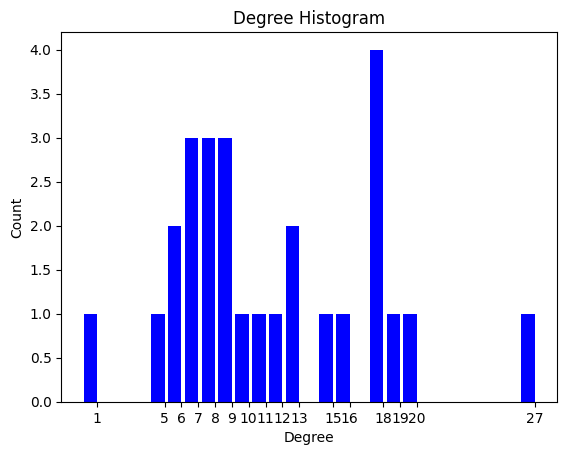

In [13]:
# DEGREE DISTRIBUTION
import matplotlib.pyplot as plt
import numpy as np
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)


In [14]:
print(nx.pagerank(G))

{'1) Toy Story (1995)': 0.6336067337029828, '2) A Bug’s Life (1998)': 0.03177645190429158, '3) Toy Story 2 (1999)': 0.014235805384531789, '4) Monsters, Inc. (2001)': 0.03222939211328196, '5) Finding Nemo (2003)': 0.030903607750569616, '6) The Incredibles (2004)': 0.015196307231312236, '7) Cars (2006)': 0.019284897517766356, '8) Ratatouille (2007)': 0.01240236543938877, '9) WALL-E (2008)': 0.01641274044465855, '10) Up (2009)': 0.015204223908672574, '11) Toy Story 3 (2010)': 0.016601531810590948, '12) Cars 2 (2011)': 0.00893454536448218, '13) Brave (2012)': 0.010459259166573302, '14) Monsters University (2013)': 0.014775566993904827, '15) Inside Out (2015)': 0.01850487686572807, '16) The Good Dinosaur (2015)': 0.012579528360400709, '17) Finding Dory (2016)': 0.009570941640866236, '18) Cars 3 (2017)': 0.007398458311356602, '19) Coco (2017)': 0.01136960711040208, '20) Incredibles 2 (2018)': 0.00895278609873212, '21) Toy Story 4 (2019)': 0.01458228980920991, '22) Onward (2020)': 0.007584299